In [1]:
import pathlib
import os
import cv2
import glob
import copy
import time
import numpy as np
import random
import keras
from keras.models import model_from_json
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')+

Using TensorFlow backend.
/home/dev/Documents/Project_age_gender/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dev/Documents/Project_age_gender/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dev/Documents/Project_age_gender/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/de

In [2]:
def get_list_path(path):
    """
    :param path:  path to datasets ( data )
    :return: list of path to image with format: data/{age_label}/{gender_label/img.*}
    """
    data_root = pathlib.Path(path)
    all_image_paths = data_root.glob('*/*/*')
    all_path_images = [str(path_img) for path_img in all_image_paths]
    random.shuffle(all_path_images)
    return all_path_images


In [3]:
all_image_data = get_list_path('../data')
all_image_aug = get_list_path('../data_agu/train')
all_image_data.extend(all_image_aug)

In [4]:
def get_age_label(all_image_data):
    age_list = []
    for path_img in all_image_data:
        path_root = pathlib.Path(path_img)
        age = path_root.parent.parent.name
        age_list.append(age)
    return age_list

# remove image shape <100 in data augment ( 4,5 age label)

In [5]:
def remove_image(list_path):
    count = 0
    for path in list_path:
        img = cv2.imread(path)
        height, _, _ = img.shape
        if height < 100:
            try:
                os.remove(path)
                print('remove: {}'.format(path))
                count+=1
            except:
                pass
    print("Total: {}".format(count))

In [6]:
pt = glob.glob('../data_finetune/data_train/mega_age/6/1/*.jpg')
random.shuffle(pt)
cp_pt = copy.deepcopy(pt)

In [7]:
pt

['../data_finetune/data_train/mega_age/6/1/12727.jpg',
 '../data_finetune/data_train/mega_age/6/1/37883.jpg',
 '../data_finetune/data_train/mega_age/6/1/8565.jpg',
 '../data_finetune/data_train/mega_age/6/1/31429.jpg',
 '../data_finetune/data_train/mega_age/6/1/16344.jpg',
 '../data_finetune/data_train/mega_age/6/1/37915.jpg',
 '../data_finetune/data_train/mega_age/6/1/15262.jpg',
 '../data_finetune/data_train/mega_age/6/1/38227.jpg',
 '../data_finetune/data_train/mega_age/6/1/10720.jpg',
 '../data_finetune/data_train/mega_age/6/1/15190.jpg',
 '../data_finetune/data_train/mega_age/6/1/25478.jpg',
 '../data_finetune/data_train/mega_age/6/1/12720.jpg',
 '../data_finetune/data_train/mega_age/6/1/30757.jpg',
 '../data_finetune/data_train/mega_age/6/1/17045.jpg',
 '../data_finetune/data_train/mega_age/6/1/32027.jpg',
 '../data_finetune/data_train/mega_age/6/1/1494.jpg',
 '../data_finetune/data_train/mega_age/6/1/9002.jpg',
 '../data_finetune/data_train/mega_age/6/1/37809.jpg',
 '../data_fin

In [8]:
i = cv2.imread('../data_finetune/data_train/mega_age/6/1/1057.jpg')

In [9]:
ct = 0
for path in cp_pt:
    try:
        img = cv2.imread(path)
        h, w, _ = img.shape
        if img is None or h < 80 or w < 80 or type(img) is NoneType:
            os.remove(path)
            ct+=1
    except:
        pass

In [10]:
ct

0

In [11]:
len(pt)

204

In [12]:
print("number of images: {}".format(len(pt)))
count = 0
for i in range(int(len(pt)/2)):
    nber = random.randint(0,len(pt))
    try:
        img = cp_pt[nber]
        os.remove(img)
        count +=1
        print("remove {}".format(img))
    except:
        pass

number of images: 204
remove ../data_finetune/data_train/mega_age/6/1/22558.jpg
remove ../data_finetune/data_train/mega_age/6/1/12579.jpg
remove ../data_finetune/data_train/mega_age/6/1/13194.jpg
remove ../data_finetune/data_train/mega_age/6/1/32424.jpg
remove ../data_finetune/data_train/mega_age/6/1/20558.jpg
remove ../data_finetune/data_train/mega_age/6/1/21048.jpg
remove ../data_finetune/data_train/mega_age/6/1/12622.jpg
remove ../data_finetune/data_train/mega_age/6/1/30015.jpg
remove ../data_finetune/data_train/mega_age/6/1/36425.jpg
remove ../data_finetune/data_train/mega_age/6/1/12441.jpg
remove ../data_finetune/data_train/mega_age/6/1/30757.jpg
remove ../data_finetune/data_train/mega_age/6/1/22013.jpg
remove ../data_finetune/data_train/mega_age/6/1/2822.jpg
remove ../data_finetune/data_train/mega_age/6/1/39397.jpg
remove ../data_finetune/data_train/mega_age/6/1/31536.jpg
remove ../data_finetune/data_train/mega_age/6/1/16186.jpg
remove ../data_finetune/data_train/mega_age/6/1/139

In [13]:
count

69

In [14]:
# i = cv2.imread('../data_aug_phase3/4/1/6219-_0_2001.jpg')

In [15]:
# i.shape

# Data pre-train

In [16]:
list_age = get_age_label(all_image_data)
set_age = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']
count_age_train = []
for ii in set_age:
    count_age_train.append(list_age.count(ii))

In [17]:
count_age_train

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [18]:
all_data_original = get_list_path('../data')
list_age_original = get_age_label(all_data_original)
count_age_train_original = []
for ii in set_age:
#     print(ii)
    count_age_train_original.append(list_age_original.count(ii))

In [19]:
count_age_train_original

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [20]:
count_aug = np.asarray(count_age_train) - np.asarray(count_age_train_original)

In [21]:
count_aug

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Data Training ( original + augmentation)

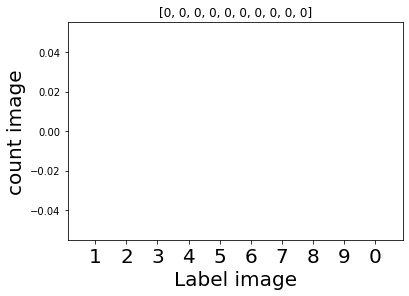

In [22]:
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']
index = np.arange(len(labels))
plt.bar(index, count_age_train)
plt.xlabel('Label image', fontsize=20)
plt.ylabel('count image', fontsize=20)
plt.xticks(index, labels, fontsize=20)
plt.title(count_age_train)
plt.show()

# Data Augmentation

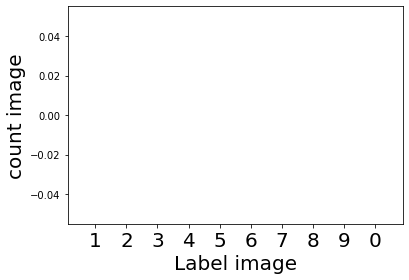

In [23]:
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']
index = np.arange(len(labels))
plt.bar(index, count_aug)
plt.xlabel('Label image', fontsize=20)
plt.ylabel('count image', fontsize=20)
plt.xticks(index, labels, fontsize=20)
plt.show()

# Data Original

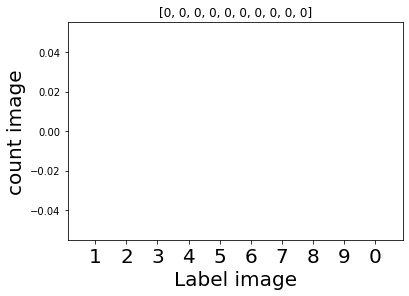

In [24]:
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']
index = np.arange(len(labels))
plt.bar(index, count_age_train_original)
plt.xlabel('Label image', fontsize=20)
plt.ylabel('count image', fontsize=20)
plt.xticks(index, labels, fontsize=20)
plt.title(count_age_train_original)
plt.show()

# Data finetuning

In [25]:
path_ds_train = '../data_finetune/data_train'
path_ds_test = '../data_finetune/data_test'

In [26]:
all_path_train = glob.glob(path_ds_train + '/*/*/*/*.jpg')
all_path_test = glob.glob(path_ds_test + '/*/*/*/*.jpg')

In [27]:
def count_age(all_path_ds):
    list_age = get_age_label(all_path_ds)
    set_age = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']
    count_age = []
    for ii in set_age:
        count_age.append(list_age.count(ii))
        
    return count_age

In [28]:
def draw_statistic(count_age, mode):
    fig = plt.figure(figsize=(12,8))
    labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']
    index = np.arange(len(labels))
    plt.bar(index, count_age)
    plt.xlabel('Label image {}'.format(mode), fontsize=20)
    plt.ylabel('count image {}'.format(mode), fontsize=20)
    plt.xticks(index, labels, fontsize=20)
    plt.title(count_age)
    plt.show()

# training

59222


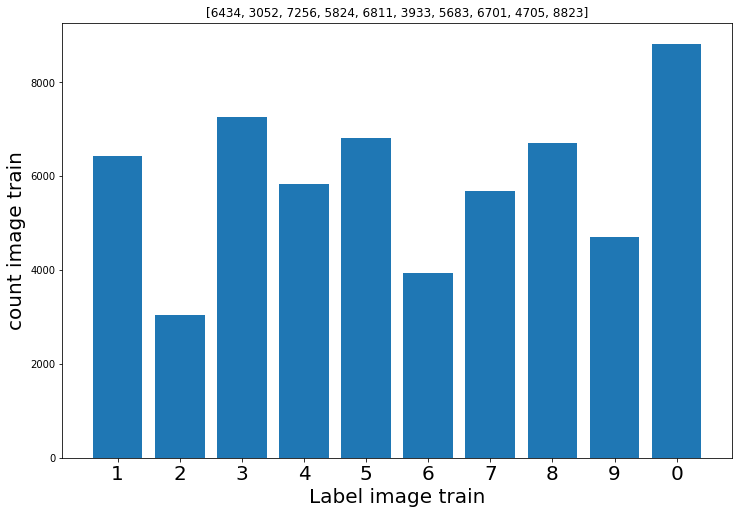

In [29]:
train_age = count_age(all_path_train)
print(sum(train_age))
draw_statistic(train_age, 'train')

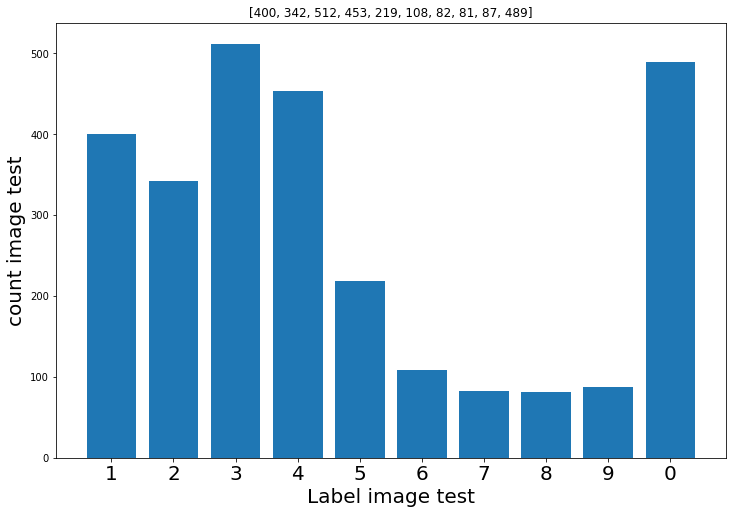

In [30]:
test_age = count_age(all_path_test)
draw_statistic(test_age, 'test')

In [31]:
len(all_path_image)

NameError: name 'all_path_image' is not defined

In [ ]:
all_path_image.extend(all_image_data)

In [ ]:
len(all_path_image)

In [ ]:
339169-68390

In [ ]:
list_age = get_age_label(all_path_image)
set_age = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']
count_age_finetune = []
for ii in set_age:
    count_age_finetune.append(list_age.count(ii))

In [ ]:
len(list_age)

In [ ]:
count_age_finetune

In [ ]:
fig = plt.figure(figsize=(12,8))
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']
index = np.arange(len(labels))
plt.bar(index, count_age_finetune)
plt.xlabel('Label image', fontsize=20)
plt.ylabel('count image', fontsize=20)
plt.xticks(index, labels, fontsize=20)
plt.title(count_age_finetune)
plt.show()

# Data augmentation ( data + megaage)